In [140]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Engg 680 Project/Turbidity.csv')

# Clean the 'Sample Date' column by stripping spaces
data['Sample Date'] = data['Sample Date'].str.strip()

# Convert the 'Sample Date' column to datetime
# Adjust the format if you know it (e.g., '%m/%d/%Y' for MM/DD/YYYY)
data['Sample Date'] = pd.to_datetime(data['Sample Date'], errors='coerce')

# Check for invalid dates
if data['Sample Date'].isna().any():
    print("Warning: Some dates could not be parsed. Check these rows:")
    print(data[data['Sample Date'].isna()])

# Drop rows with invalid dates
data.dropna(subset=['Sample Date'], inplace=True)

# Set 'Sample Date' as the index
data.set_index('Sample Date', inplace=True)


In [92]:
# Keep only the numeric column
data = data['Numeric Result'].dropna()

In [93]:
# Create lagged features for supervised learning
def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

n_lags = 12
data_lagged = create_lagged_features(data, n_lags)


In [94]:
# Split the data into features and target
X = data_lagged.drop(columns='Numeric Result')
y = data_lagged['Numeric Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [95]:
# Make predictions
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 25.47


In [96]:
#Forecasting the next 6 steps (e.g., for years 2025-2030)
forecast_steps = 6
last_observations = X.iloc[-1:].copy()
forecasts = []

for _ in range(forecast_steps):
    forecast = rf.predict(last_observations)[0]
    forecasts.append(forecast)
    # Update lagged features with new forecast
    last_observations = pd.DataFrame([[forecast] + last_observations.iloc[0, :-1].tolist()], columns=last_observations.columns)

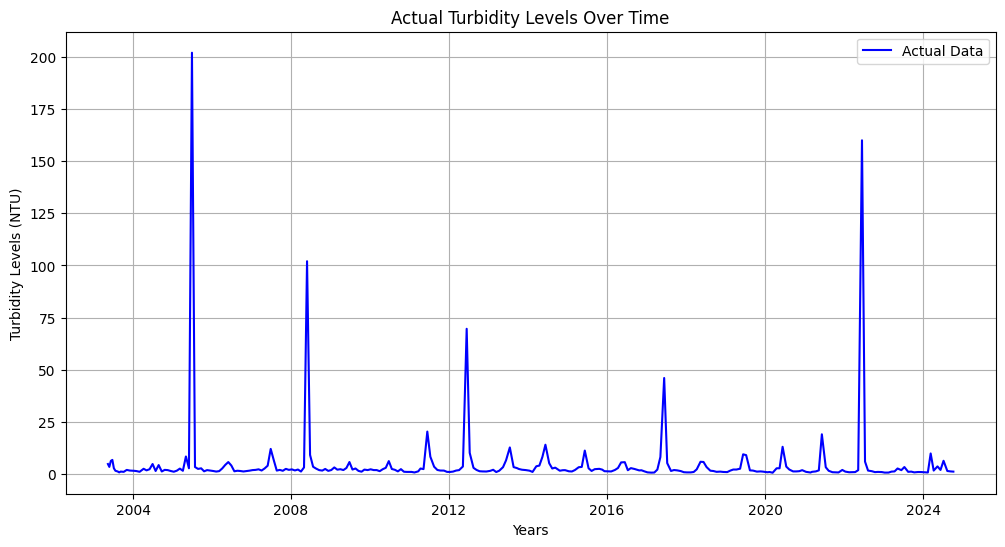

In [97]:
numeric_data = data.dropna()

# Plot actual data
plt.figure(figsize=(12, 6))
# Access the 'Numeric Result' values using the 'values' attribute of the numeric_data Series
plt.plot(numeric_data.index, numeric_data.values, label='Actual Data', color='blue')
plt.title("Actual Turbidity Levels Over Time")
plt.xlabel("Years")
plt.ylabel("Turbidity Levels (NTU)")
plt.legend()
plt.grid()
plt.show()

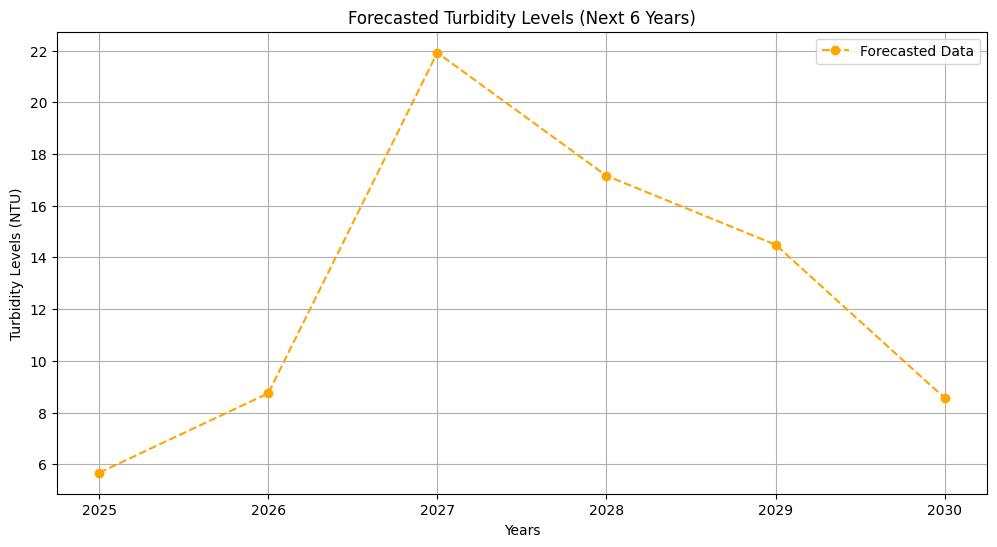

In [98]:
# Adjust forecast index for 6 years
forecast_index = pd.date_range(start=numeric_data.index[-1] + pd.offsets.YearBegin(1), periods=6, freq='YS')

# Initialize inputs for the forecast
last_observation = pd.DataFrame(numeric_data[-n_lags:].values.reshape(1, -1), columns=X.columns)
forecasts = []

# Iteratively predict for the next 6 years
for i in range(6):
    prediction = rf.predict(last_observation)[0]
    forecasts.append(prediction)

    # Update last_observation as a DataFrame (no np.roll)
    last_observation = last_observation.shift(1, axis=1).fillna(prediction)

# Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecasts, label='Forecasted Data', color='orange', linestyle='--', marker='o')
plt.title("Forecasted Turbidity Levels (Next 6 Years)")
plt.xlabel("Years")
plt.ylabel("Turbidity Levels (NTU)")
plt.legend()
plt.grid()
plt.show()

In [99]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Engg 680 Project/DO.csv')  # Example for turbidity, repeat for other parameters
data['Sample Date'] = pd.to_datetime(data['Sample Date'])
data.set_index('Sample Date', inplace=True)
# Keep only the numeric column
data = data['Numeric Result'].dropna()
# Create lagged features for supervised learning
def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

n_lags = 12
data_lagged = create_lagged_features(data, n_lags)
# Split the data into features and target
X = data_lagged.drop(columns='Numeric Result')
y = data_lagged['Numeric Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [100]:
# Make predictions
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.98


In [101]:
#Forecasting the next 6 steps (e.g., for years 2025-2030)
forecast_steps = 6
last_observations = X.iloc[-1:].copy()
forecasts = []

for _ in range(forecast_steps):
    forecast = rf.predict(last_observations)[0]
    forecasts.append(forecast)
    # Update lagged features with new forecast
    last_observations = pd.DataFrame([[forecast] + last_observations.iloc[0, :-1].tolist()], columns=last_observations.columns)

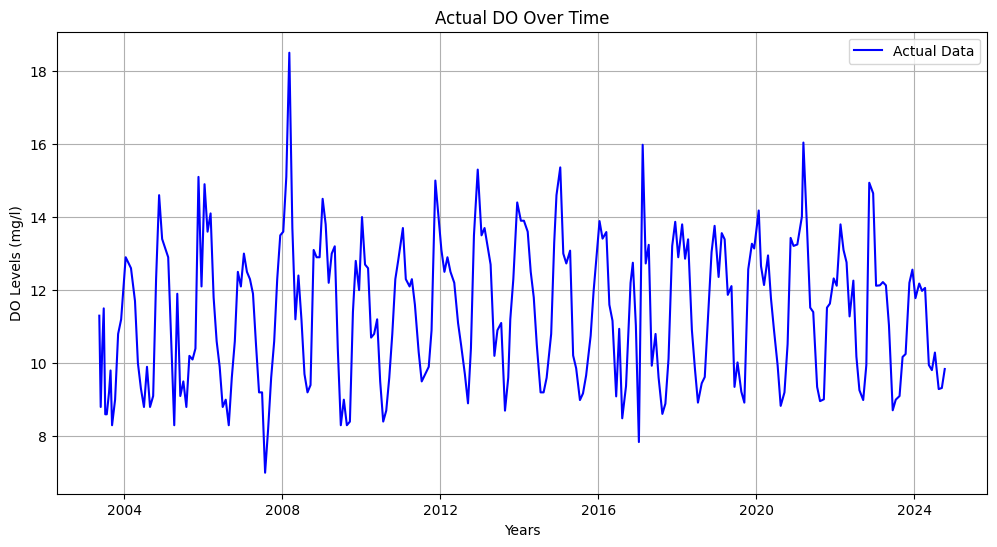

In [102]:
numeric_data = data.dropna()

# Plot actual data
plt.figure(figsize=(12, 6))
# Access the 'Numeric Result' values using the 'values' attribute of the numeric_data Series
plt.plot(numeric_data.index, numeric_data.values, label='Actual Data', color='blue')
plt.title("Actual DO Over Time")
plt.xlabel("Years")
plt.ylabel("DO Levels (mg/l)")
plt.legend()
plt.grid()
plt.show()

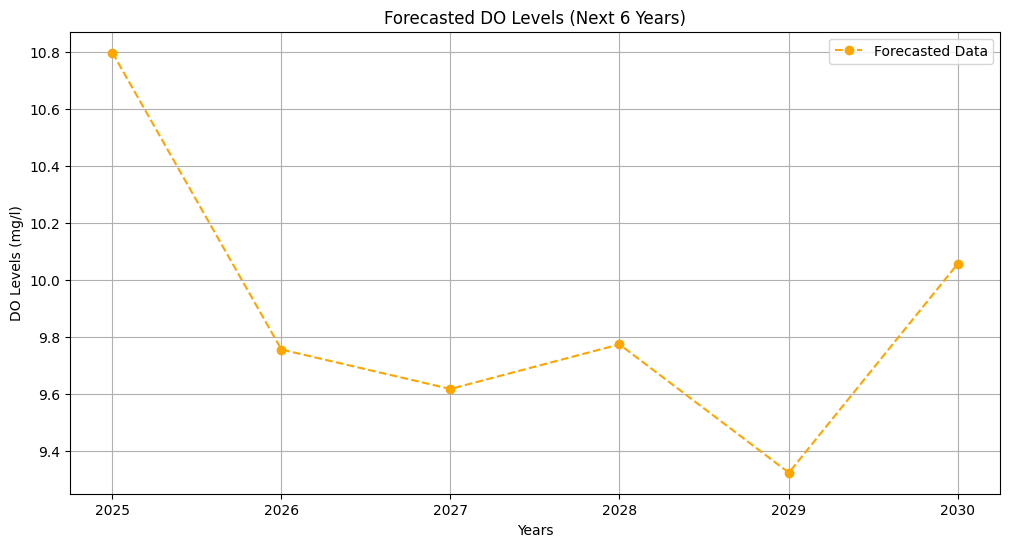

In [103]:
# Adjust forecast index for 6 years
forecast_index = pd.date_range(start=numeric_data.index[-1] + pd.offsets.YearBegin(1), periods=6, freq='YS')

# Initialize inputs for the forecast
last_observation = pd.DataFrame(numeric_data[-n_lags:].values.reshape(1, -1), columns=X.columns)
forecasts = []

# Iteratively predict for the next 6 years
for i in range(6):
    prediction = rf.predict(last_observation)[0]
    forecasts.append(prediction)

    # Update last_observation as a DataFrame (no np.roll)
    last_observation = last_observation.shift(1, axis=1).fillna(prediction)

# Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecasts, label='Forecasted Data', color='orange', linestyle='--', marker='o')
plt.title("Forecasted DO Levels (Next 6 Years)")
plt.xlabel("Years")
plt.ylabel("DO Levels (mg/l)")
plt.legend()
plt.grid()
plt.show()

In [106]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Engg 680 Project/Nitrate.csv')  # Ensure this path is correct

# Strip extra spaces and convert to datetime
data['Sample Date'] = data['Sample Date'].str.strip()
data['Sample Date'] = pd.to_datetime(data['Sample Date'], errors='coerce')

# Check for invalid dates
if data['Sample Date'].isna().any():
    print("Warning: Some dates could not be parsed. Check these rows:")
    print(data[data['Sample Date'].isna()])

# Drop rows with invalid dates
data.dropna(subset=['Sample Date'], inplace=True)

# Set the 'Sample Date' as the index
data.set_index('Sample Date', inplace=True)

# Keep only the numeric column
data = data['Numeric Result'].dropna()

# Create lagged features for supervised learning
def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

n_lags = 12
data_lagged = create_lagged_features(data, n_lags)

# Split the data into features and target
X = data_lagged.drop(columns='Numeric Result')
y = data_lagged['Numeric Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest model trained successfully.")


   ID                   Sample Site  Numeric Result  Formatted Result  \
3 NaN  Bow River Below Bearspaw Dam           0.079             0.079   

  Result Units  Latitude (Degrees)  Longitude (Degrees) Sample Date  \
3         mg/L            51.10122           -114.27975         NaT   

         Parameter   Site Key  
3  Nitrate (NO3-N)  SUR_BR-BD  
Random Forest model trained successfully.


In [107]:
# Make predictions
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.07


In [108]:
#Forecasting the next 6 steps (e.g., for years 2025-2030)
forecast_steps = 6
last_observations = X.iloc[-1:].copy()
forecasts = []

for _ in range(forecast_steps):
    forecast = rf.predict(last_observations)[0]
    forecasts.append(forecast)
    # Update lagged features with new forecast
    last_observations = pd.DataFrame([[forecast] + last_observations.iloc[0, :-1].tolist()], columns=last_observations.columns)

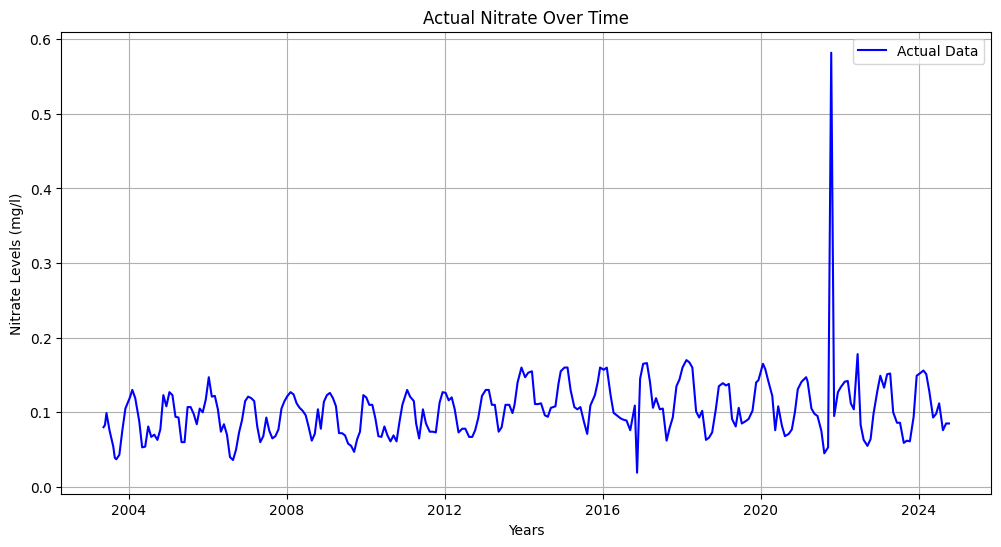

In [109]:
numeric_data = data.dropna()

# Plot actual data
plt.figure(figsize=(12, 6))
# Access the 'Numeric Result' values using the 'values' attribute of the numeric_data Series
plt.plot(numeric_data.index, numeric_data.values, label='Actual Data', color='blue')
plt.title("Actual Nitrate Over Time")
plt.xlabel("Years")
plt.ylabel("Nitrate Levels (mg/l)")
plt.legend()
plt.grid()
plt.show()

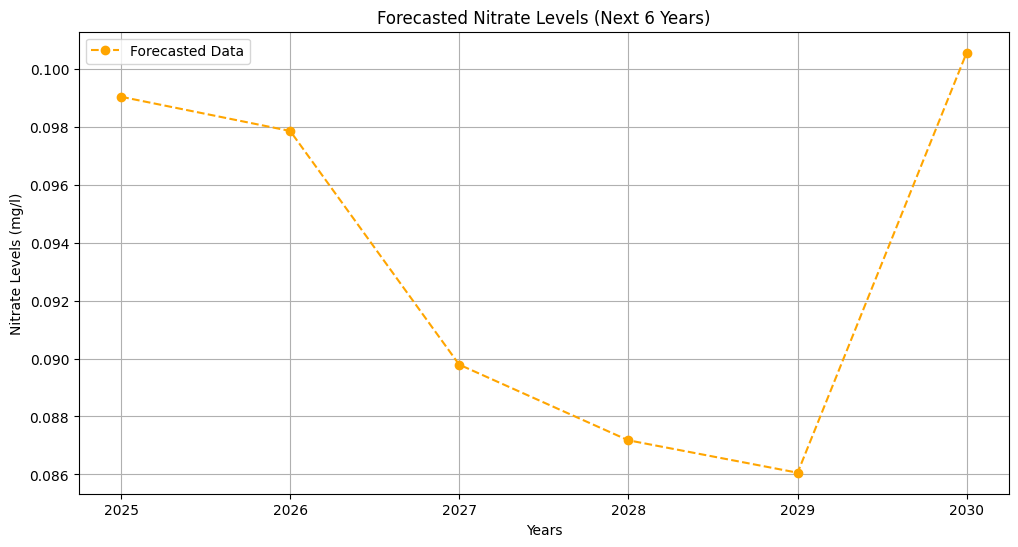

In [110]:
# Adjust forecast index for 6 years
forecast_index = pd.date_range(start=numeric_data.index[-1] + pd.offsets.YearBegin(1), periods=6, freq='YS')

# Initialize inputs for the forecast
last_observation = pd.DataFrame(numeric_data[-n_lags:].values.reshape(1, -1), columns=X.columns)
forecasts = []

# Iteratively predict for the next 6 years
for i in range(6):
    prediction = rf.predict(last_observation)[0]
    forecasts.append(prediction)

    # Update last_observation as a DataFrame (no np.roll)
    last_observation = last_observation.shift(1, axis=1).fillna(prediction)

# Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecasts, label='Forecasted Data', color='orange', linestyle='--', marker='o')
plt.title("Forecasted Nitrate Levels (Next 6 Years)")
plt.xlabel("Years")
plt.ylabel("Nitrate Levels (mg/l)")
plt.legend()
plt.grid()
plt.show()

In [114]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Engg 680 Project/Total Phosphorous.csv')

# Clean the 'Sample Date' column by stripping extra spaces
data['Sample Date'] = data['Sample Date'].str.strip()

# Convert to datetime format
data['Sample Date'] = pd.to_datetime(data['Sample Date'], errors='coerce')

# Check for invalid dates
if data['Sample Date'].isna().any():
    print("Warning: Some dates could not be parsed. Check these rows:")
    print(data[data['Sample Date'].isna()])

# Drop rows with invalid dates
data.dropna(subset=['Sample Date'], inplace=True)

# Set the 'Sample Date' column as the index
data.set_index('Sample Date', inplace=True)

# Keep only the numeric column
data = data['Numeric Result'].dropna()

# Create lagged features for supervised learning
def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

n_lags = 12
data_lagged = create_lagged_features(data, n_lags)

# Split the data into features and target
X = data_lagged.drop(columns='Numeric Result')
y = data_lagged['Numeric Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest model trained successfully.")


Random Forest model trained successfully.


In [115]:
# Make predictions
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.02


In [116]:
#Forecasting the next 6 steps (e.g., for years 2025-2030)
forecast_steps = 6
last_observations = X.iloc[-1:].copy()
forecasts = []

for _ in range(forecast_steps):
    forecast = rf.predict(last_observations)[0]
    forecasts.append(forecast)
    # Update lagged features with new forecast
    last_observations = pd.DataFrame([[forecast] + last_observations.iloc[0, :-1].tolist()], columns=last_observations.columns)

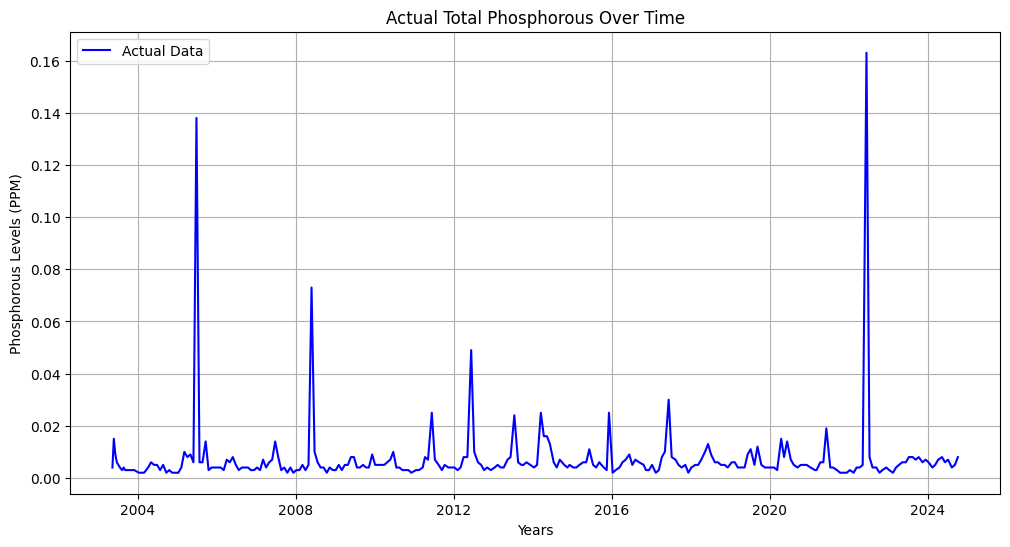

In [117]:
numeric_data = data.dropna()

# Plot actual data
plt.figure(figsize=(12, 6))
# Access the 'Numeric Result' values using the 'values' attribute of the numeric_data Series
plt.plot(numeric_data.index, numeric_data.values, label='Actual Data', color='blue')
plt.title("Actual Total Phosphorous Over Time")
plt.xlabel("Years")
plt.ylabel("Phosphorous Levels (PPM)")
plt.legend()
plt.grid()
plt.show()

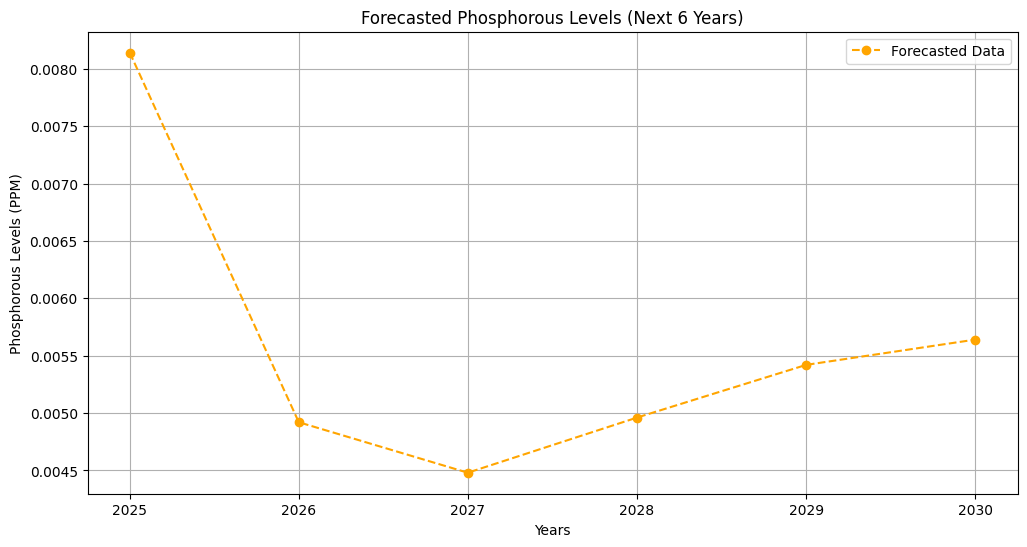

In [118]:
# Adjust forecast index for 6 years
forecast_index = pd.date_range(start=numeric_data.index[-1] + pd.offsets.YearBegin(1), periods=6, freq='YS')

# Initialize inputs for the forecast
last_observation = pd.DataFrame(numeric_data[-n_lags:].values.reshape(1, -1), columns=X.columns)
forecasts = []

# Iteratively predict for the next 6 years
for i in range(6):
    prediction = rf.predict(last_observation)[0]
    forecasts.append(prediction)

    # Update last_observation as a DataFrame (no np.roll)
    last_observation = last_observation.shift(1, axis=1).fillna(prediction)

# Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecasts, label='Forecasted Data', color='orange', linestyle='--', marker='o')
plt.title("Forecasted Phosphorous Levels (Next 6 Years)")
plt.xlabel("Years")
plt.ylabel("Phosphorous Levels (PPM)")
plt.legend()
plt.grid()
plt.show()

In [120]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Engg 680 Project/Water Temperature.csv', encoding='latin-1')

# Strip leading/trailing spaces from the 'Sample Date' column
data['Sample Date'] = data['Sample Date'].str.strip()

# Convert 'Sample Date' to datetime, handling errors gracefully
data['Sample Date'] = pd.to_datetime(data['Sample Date'], errors='coerce')

# Check for invalid dates
if data['Sample Date'].isna().any():
    print("Warning: Some dates could not be parsed. Invalid rows:")
    print(data[data['Sample Date'].isna()])

# Drop rows with invalid dates
data.dropna(subset=['Sample Date'], inplace=True)

# Set 'Sample Date' as the index
data.set_index('Sample Date', inplace=True)

# Keep only the numeric column
data = data['Numeric Result'].dropna()

# Create lagged features for supervised learning
def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

n_lags = 12
data_lagged = create_lagged_features(data, n_lags)

# Split the data into features and target
X = data_lagged.drop(columns='Numeric Result')
y = data_lagged['Numeric Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest model trained successfully.")


Random Forest model trained successfully.


In [121]:
# Make predictions
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 1.61


In [122]:
#Forecasting the next 6 steps (e.g., for years 2025-2030)
forecast_steps = 6
last_observations = X.iloc[-1:].copy()
forecasts = []

for _ in range(forecast_steps):
    forecast = rf.predict(last_observations)[0]
    forecasts.append(forecast)
    # Update lagged features with new forecast
    last_observations = pd.DataFrame([[forecast] + last_observations.iloc[0, :-1].tolist()], columns=last_observations.columns)

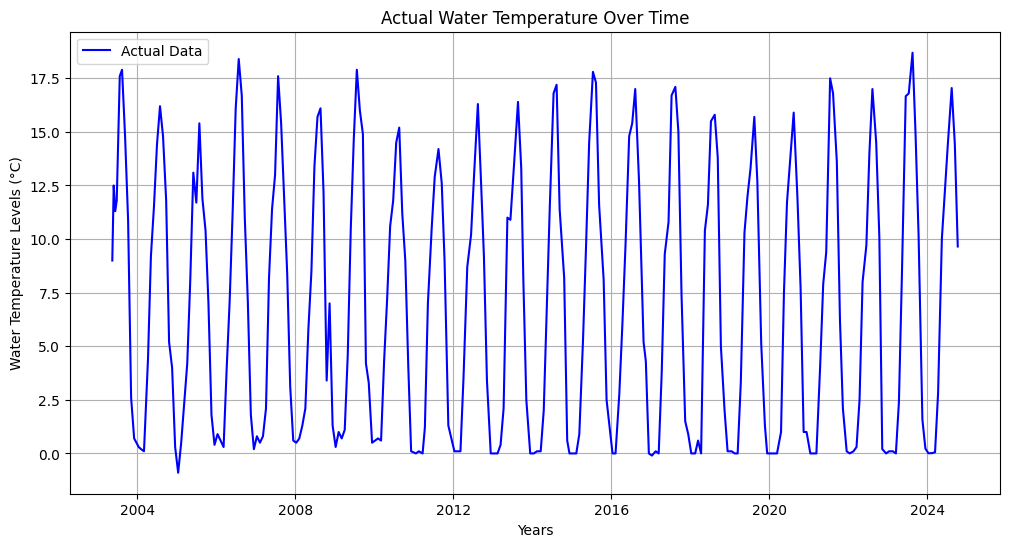

In [123]:
numeric_data = data.dropna()

# Plot actual data
plt.figure(figsize=(12, 6))
# Access the 'Numeric Result' values using the 'values' attribute of the numeric_data Series
plt.plot(numeric_data.index, numeric_data.values, label='Actual Data', color='blue')
plt.title("Actual Water Temperature Over Time")
plt.xlabel("Years")
plt.ylabel("Water Temperature Levels (°C)")
plt.legend()
plt.grid()
plt.show()

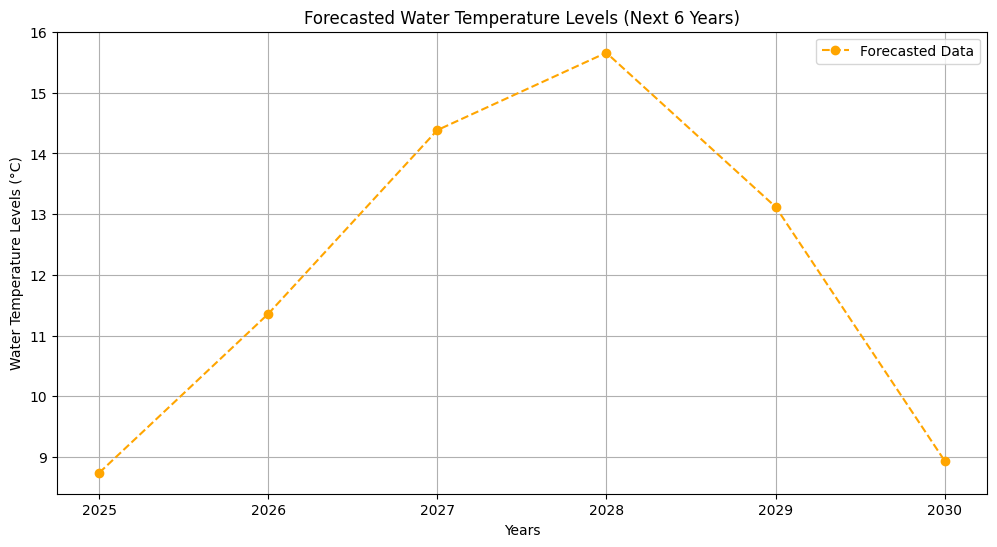

In [124]:
# Adjust forecast index for 6 years
forecast_index = pd.date_range(start=numeric_data.index[-1] + pd.offsets.YearBegin(1), periods=6, freq='YS')

# Initialize inputs for the forecast
last_observation = pd.DataFrame(numeric_data[-n_lags:].values.reshape(1, -1), columns=X.columns)
forecasts = []

# Iteratively predict for the next 6 years
for i in range(6):
    prediction = rf.predict(last_observation)[0]
    forecasts.append(prediction)

    # Update last_observation as a DataFrame (no np.roll)
    last_observation = last_observation.shift(1, axis=1).fillna(prediction)

# Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecasts, label='Forecasted Data', color='orange', linestyle='--', marker='o')
plt.title("Forecasted Water Temperature Levels (Next 6 Years)")
plt.xlabel("Years")
plt.ylabel("Water Temperature Levels (°C)")
plt.legend()
plt.grid()
plt.show()

In [126]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Engg 680 Project/pH.csv')

# Strip extra spaces in the 'Sample Date' column
data['Sample Date'] = data['Sample Date'].str.strip()

# Convert 'Sample Date' to datetime, handling errors gracefully
data['Sample Date'] = pd.to_datetime(data['Sample Date'], errors='coerce')

# Check for invalid dates
if data['Sample Date'].isna().any():
    print("Warning: Some dates could not be parsed. Invalid rows:")
    print(data[data['Sample Date'].isna()])

# Drop rows with invalid dates
data.dropna(subset=['Sample Date'], inplace=True)

# Set 'Sample Date' as the index
data.set_index('Sample Date', inplace=True)

# Keep only the numeric column
data = data['Numeric Result'].dropna()

# Create lagged features for supervised learning
def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

n_lags = 12
data_lagged = create_lagged_features(data, n_lags)

# Split the data into features and target
X = data_lagged.drop(columns='Numeric Result')
y = data_lagged['Numeric Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest model trained successfully.")


Random Forest model trained successfully.


In [127]:
# Make predictions
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.07


In [128]:
#Forecasting the next 6 steps (e.g., for years 2025-2030)
forecast_steps = 6
last_observations = X.iloc[-1:].copy()
forecasts = []

for _ in range(forecast_steps):
    forecast = rf.predict(last_observations)[0]
    forecasts.append(forecast)
    # Update lagged features with new forecast
    last_observations = pd.DataFrame([[forecast] + last_observations.iloc[0, :-1].tolist()], columns=last_observations.columns)

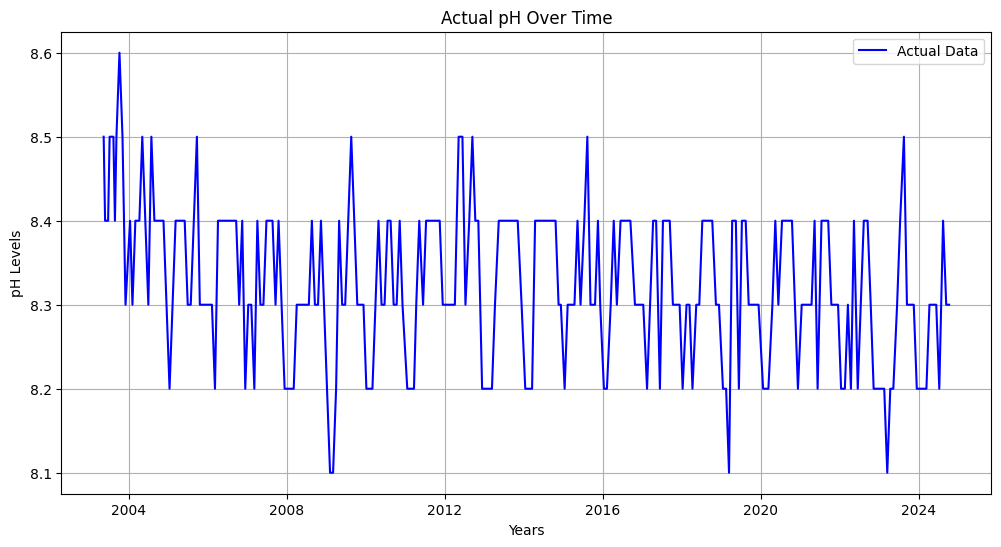

In [129]:
numeric_data = data.dropna()

# Plot actual data
plt.figure(figsize=(12, 6))
# Access the 'Numeric Result' values using the 'values' attribute of the numeric_data Series
plt.plot(numeric_data.index, numeric_data.values, label='Actual Data', color='blue')
plt.title("Actual pH Over Time")
plt.xlabel("Years")
plt.ylabel("pH Levels")
plt.legend()
plt.grid()
plt.show()

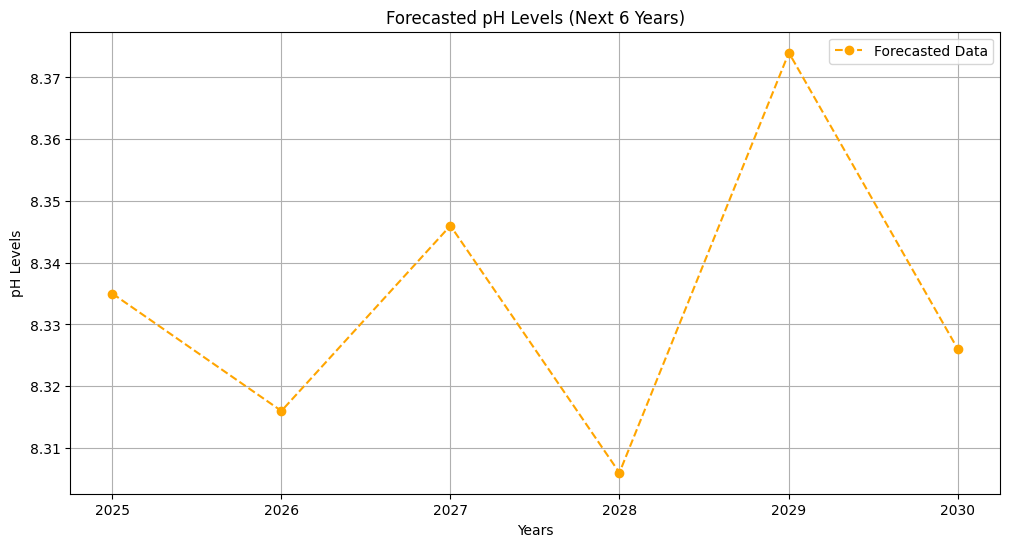

In [130]:
# Adjust forecast index for 6 years
forecast_index = pd.date_range(start=numeric_data.index[-1] + pd.offsets.YearBegin(1), periods=6, freq='YS')

# Initialize inputs for the forecast
last_observation = pd.DataFrame(numeric_data[-n_lags:].values.reshape(1, -1), columns=X.columns)
forecasts = []

# Iteratively predict for the next 6 years
for i in range(6):
    prediction = rf.predict(last_observation)[0]
    forecasts.append(prediction)

    # Update last_observation as a DataFrame (no np.roll)
    last_observation = last_observation.shift(1, axis=1).fillna(prediction)

# Plot forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_index, forecasts, label='Forecasted Data', color='orange', linestyle='--', marker='o')
plt.title("Forecasted pH Levels (Next 6 Years)")
plt.xlabel("Years")
plt.ylabel("pH Levels")
plt.legend()
plt.grid()
plt.show()

In [132]:
import pandas as pd
import numpy as np

# Example standards and weights for water quality parameters
parameters = {
    "pH": {"ideal": 7.0, "standard": 8.5, "weight": 0.2, "type": "range", "range": (6.5, 8.5)},
    "DO": {"ideal": 8.0, "standard": 5.0, "weight": 0.3, "type": "min", "limit": 5.0},
    "Turbidity": {"ideal": 0, "standard": 5.0, "weight": 0.2, "type": "max", "limit": 5.0},
    "Nitrate": {"ideal": 0, "standard": 10.0, "weight": 0.2, "type": "max", "limit": 10.0},
    "Total_Phosphorous": {"ideal": 0, "standard": 0.1, "weight": 0.1, "type": "max", "limit": 0.1},
}

# File paths for the data
file_paths = {
    "Nitrate": "/content/drive/MyDrive/Engg 680 Project/Nitrate.csv",
    "DO": "/content/drive/MyDrive/Engg 680 Project/DO.csv",
    "pH": "/content/drive/MyDrive/Engg 680 Project/pH.csv",
    "Total_Phosphorous": "/content/drive/MyDrive/Engg 680 Project/Total Phosphorous.csv",
    "Turbidity": "/content/drive/MyDrive/Engg 680 Project/Turbidity.csv",
}

# Specify the year for which WQI needs to be calculated
target_year = 2024

# Initialize variables for CCME WQI calculation
num_failed_parameters = 0
num_failed_tests = 0
amplitude_sum = 0
total_tests = 0

# Variables for Horton WQI calculation
weighted_qi_sum = 0
total_weight = 0

# Process each parameter
for param, path in file_paths.items():
    try:
        # Load the dataset
        df = pd.read_csv(path)

        # Ensure required columns exist
        if "Sample Date" not in df.columns or "Numeric Result" not in df.columns:
            print(f"Error: Required columns not found in {param} file. Skipping...")
            continue

        # Parse dates in the 'Sample Date' column
        df['Sample Date'] = pd.to_datetime(df['Sample Date'], errors="coerce")

        # Check if any valid dates exist
        if df['Sample Date'].isna().all():
            print(f"Error: Unable to parse any valid dates in {param} file. Skipping...")
            continue

        # Filter for the target year
        df = df[df['Sample Date'].dt.year == target_year]

        # Ensure data is available
        if df.empty:
            print(f"No data for the year {target_year} in {param} file. Skipping...")
            continue

        # Clean the data
        df = df[["Numeric Result"]].dropna()

        # Fetch standards and details for the parameter
        std = parameters[param]

        # Calculate failures for CCME WQI
        if std["type"] == "max":
            failed_tests = df[df["Numeric Result"] > std["limit"]]
        elif std["type"] == "min":
            failed_tests = df[df["Numeric Result"] < std["limit"]]
        elif std["type"] == "range":
            failed_tests = df[(df["Numeric Result"] < std["range"][0]) | (df["Numeric Result"] > std["range"][1])]

        # F1 (Scope): Parameters that fail at least once
        if not failed_tests.empty:
            num_failed_parameters += 1

        # F2 (Frequency): Total failed tests
        num_failed_tests += len(failed_tests)
        total_tests += len(df)

        # F3 (Amplitude): Magnitude of exceedance
        for _, row in failed_tests.iterrows():
            if std["type"] == "max":
                deviation = (row["Numeric Result"] - std["limit"]) / std["limit"]
            elif std["type"] == "min":
                deviation = (std["limit"] - row["Numeric Result"]) / std["limit"]
            elif std["type"] == "range":
                if row["Numeric Result"] < std["range"][0]:
                    deviation = (std["range"][0] - row["Numeric Result"]) / std["range"][0]
                else:
                    deviation = (row["Numeric Result"] - std["range"][1]) / std["range"][1]
            amplitude_sum += deviation

        # Calculate Horton QI
        observed_value = df["Numeric Result"].mean()
        ideal = std["ideal"]
        standard = std["standard"]
        weight = std["weight"]

        # Quality Index (QI) for Horton method
        qi = (observed_value - ideal) / (standard - ideal) * 100
        qi = max(0, min(qi, 100))  # Clamp QI between 0 and 100
        weighted_qi_sum += qi * weight
        total_weight += weight

    except Exception as e:
        print(f"Error processing {param} file: {e}")

# Final CCME WQI Calculations
F1 = (num_failed_parameters / len(parameters)) * 100
F2 = (num_failed_tests / total_tests) * 100 if total_tests > 0 else 0
nse = amplitude_sum / num_failed_tests if num_failed_tests > 0 else 0
F3 = (nse / (nse + 1)) * 100
CCME_WQI = 100 - np.sqrt((F1**2 + F2**2 + F3**2) / 1.732)

# Final Horton WQI Calculation
Horton_WQI = weighted_qi_sum / total_weight if total_weight > 0 else None

# Print results
print(f"CCME WQI for {target_year}: {CCME_WQI:.2f}")
print(f"Horton WQI for {target_year}: {Horton_WQI:.2f}" if Horton_WQI is not None else "Horton WQI could not be calculated.")


CCME WQI for 2024: 67.26
Horton WQI for 2024: 30.35


In [133]:
# Categorization
def categorize_wqi(wqi):
    if wqi >= 95:
        return "Excellent"
    elif 80 <= wqi < 95:
        return "Good"
    elif 65 <= wqi < 80:
        return "Fair"
    elif 45 <= wqi < 65:
        return "Marginal"
    else:
        return "Poor"

ccme_category = categorize_wqi(CCME_WQI)
horton_category = categorize_wqi(Horton_WQI)

# Output results
print(f"CCME Water Quality Index (WQI): {CCME_WQI:.2f} - Category: {ccme_category}")
print(f"Horton Water Quality Index (WQI): {Horton_WQI:.2f} - Category: {horton_category}")


CCME Water Quality Index (WQI): 67.26 - Category: Fair
Horton Water Quality Index (WQI): 30.35 - Category: Poor


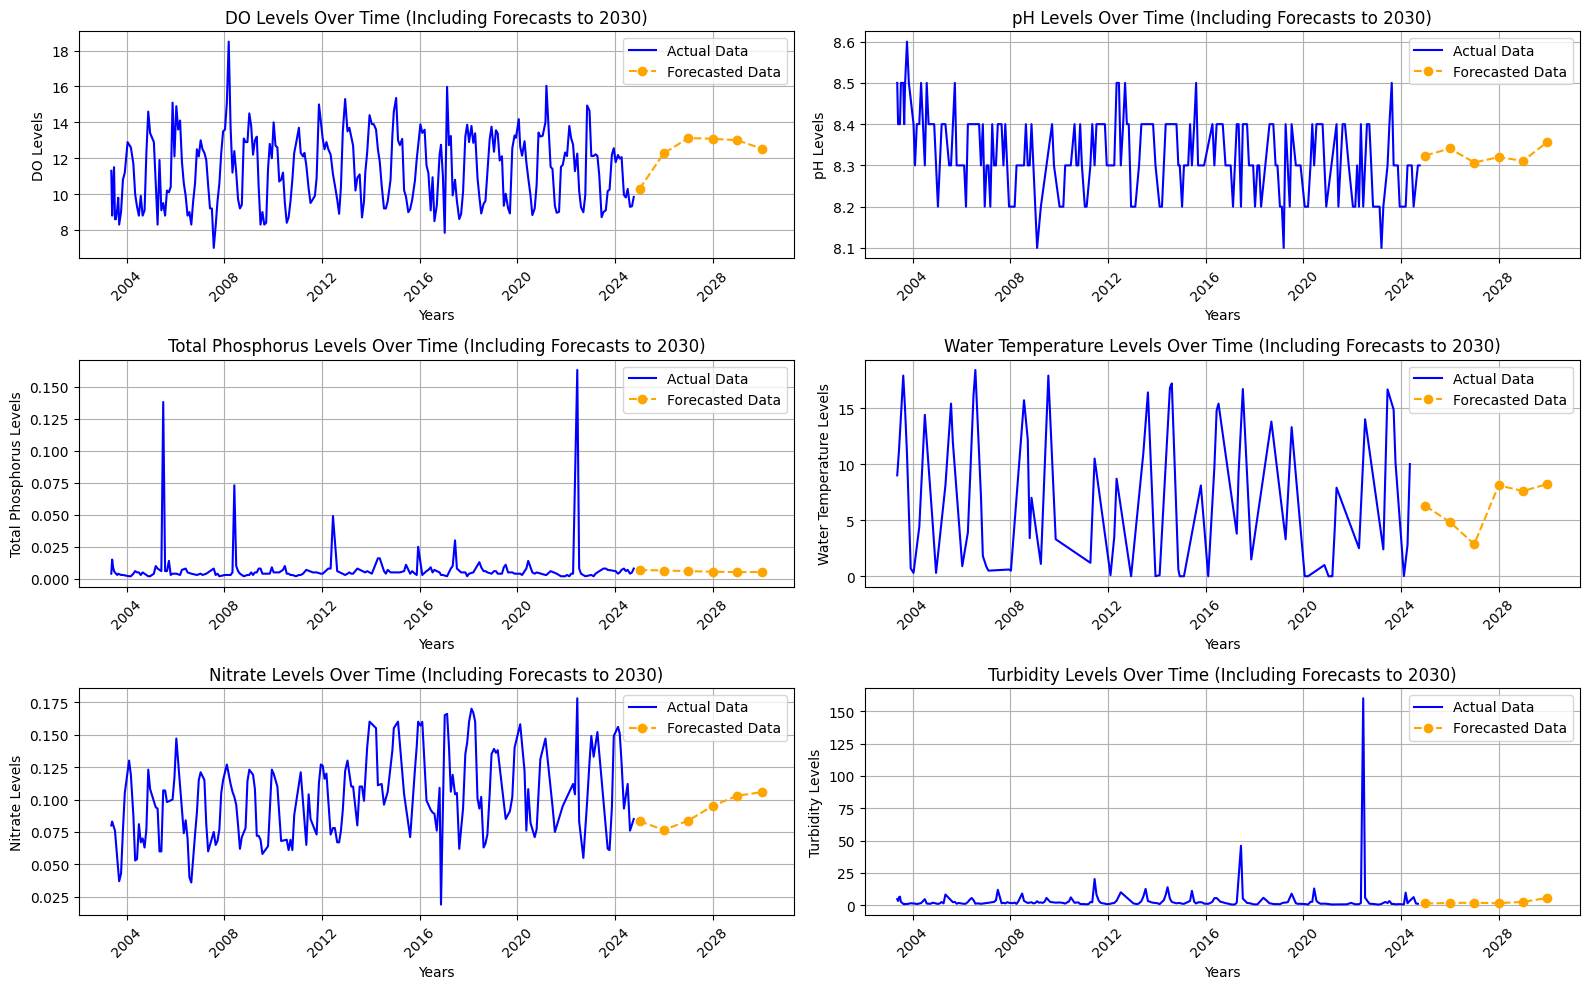

In [141]:
# Function to create lagged features
def create_lagged_features(data, n_lags=12):
    df = pd.DataFrame(data)
    for lag in range(1, n_lags + 1):
        df[f'lag_{lag}'] = df['Numeric Result'].shift(lag)
    df.dropna(inplace=True)
    return df

# Parameters and file paths
parameters = {
    "DO": "/content/drive/MyDrive/Engg 680 Project/DO.csv",
    "pH": "/content/drive/MyDrive/Engg 680 Project/pH.csv",
    "Total Phosphorus": "/content/drive/MyDrive/Engg 680 Project/Total Phosphorous.csv",
    "Water Temperature": "/content/drive/MyDrive/Engg 680 Project/Water Temperature.csv",
    "Nitrate": "/content/drive/MyDrive/Engg 680 Project/Nitrate.csv",
    "Turbidity": "/content/drive/MyDrive/Engg 680 Project/Turbidity.csv",
}

# Store data for plotting
results = {}

# Process each parameter
for param, file_path in parameters.items():
    # Load dataset
    data = pd.read_csv(file_path)
    data['Sample Date'] = pd.to_datetime(data['Sample Date'], errors='coerce')
    data.dropna(subset=['Sample Date'], inplace=True)
    data.set_index('Sample Date', inplace=True)
    numeric_data = data['Numeric Result'].dropna()

    # Create lagged features
    n_lags = 12
    data_lagged = create_lagged_features(numeric_data, n_lags)

    # Prepare training and testing data
    X = data_lagged.drop(columns='Numeric Result')
    y = data_lagged['Numeric Result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Train Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Generate forecasts up to 2029
    forecast_steps = 2029 - numeric_data.index[-1].year + 1
    last_observation = X.iloc[-1:].copy()
    forecasts = []
    for _ in range(forecast_steps):
        forecast = rf.predict(last_observation)[0]
        forecasts.append(forecast)
        last_observation = pd.DataFrame([[forecast] + last_observation.iloc[0, :-1].tolist()],
                                        columns=last_observation.columns)

    # Save actual and forecast data for plotting
    results[param] = {
        "actual": numeric_data,
        "forecast": forecasts,
        "forecast_index": pd.date_range(start=numeric_data.index[-1] + pd.offsets.YearBegin(1),
                                        periods=forecast_steps, freq='YS')
    }

# Plotting
plt.figure(figsize=(16, 10))
for i, (param, data) in enumerate(results.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(data["actual"].index, data["actual"].values, label="Actual Data", color="blue")
    plt.plot(data["forecast_index"], data["forecast"], label="Forecasted Data", color="orange", linestyle="--", marker="o")
    plt.title(f"{param} Levels Over Time (Including Forecasts to 2030)")
    plt.xlabel("Years")
    plt.ylabel(f"{param} Levels")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()
